# Data Exploration with Python

## EXERCISE 1: Reading and accessing data

### Read the survey response data

The `csv` module supports reading and writing of files in comma-separated values (CSV) and similar formats. We use `DictReader` since the first row of our survey responses file is a header. This produces a list of dictionaries, one dictionary per each individual survey response. 

A _dictionary_ is a data structure in Python that can hold key-value pairs, where we can lookup values by their key (typically a string, cf. Grok module 9). 

The `pprint` command below prints the dictionary corresponding the the first response.

In [1]:
import csv
import pprint
data = list(csv.DictReader(open('Copy of Survey COMP5310 2019s1 (Responses) - Form Responses 1.csv')))
pprint.pprint(data[0])

OrderedDict([('Timestamp', '2/12/2019 13:09:48'),
             ('Group Name (use DNA if none)', 'Ali Anaissi'),
             ('What main industry have you worked in?',
              'Education and Training'),
             ('How many years professional experience do you have?', '7'),
             ('How many years programming experience do you have?', '4'),
             ('What key experiences do you have?',
              'Machine learning, Data mining, Programming, Software '
              'Engineering'),
             ('Data management', '3'),
             ('Statistics', '3'),
             ('Visualisation', '3'),
             ('Machine Learning & Data Mining', '4'),
             ('Software Engineering', '4'),
             ('Communication', '4'),
             ('How would you define Data Science in one sentence?',
              'Extracting knowledge from data'),
             ('What key skills do you want to develop?',
              'Relational databases, Natural Language Processing, '
    

### Let's define constants for dictionary keys

Before moving on, let's define constants for the keys of this dictionary that will make it a bit easier to use. In our case, the keys are simply the questions from our survey in Week 1.

In [2]:
TIMESTAMP = 'Timestamp'
BACKGROUND_INDUSTRY = 'What main industry have you worked in?'
BACKGROUND_YEARS_PROFESSIONAL = 'How many years professional experience do you have?'
BACKGROUND_YEARS_PROGRAMMING = 'How many years programming experience do you have?'
BACKGROUND_SKILLS = 'What key experience do you have?'
IMPORT_DATA_MANAGEMENT = 'Data management'
IMPORT_STATISTICS = 'Statistics'
IMPORT_VISUALISATION = 'Visualisation'
IMPORT_MACHINE_LEARNING = 'Machine Learning & Data Mining'
IMPORT_SOFTWARE_ENGINEERING = 'Software Engineering'
IMPORT_COMMUNICATION = 'Communication'
GOALS_DEFINITION = 'How would you define Data Science in one sentence?'
GOALS_SKILLS = 'What key skills do you want to learn?'
GOALS_ROLE = 'What kind of role would you like to go into?'
GOALS_INDUSTRY = 'What industry would you like to go into?'
IMPORT_AREAS = [
    IMPORT_DATA_MANAGEMENT,
    IMPORT_STATISTICS,
    IMPORT_VISUALISATION,
    IMPORT_MACHINE_LEARNING,
    IMPORT_SOFTWARE_ENGINEERING,
    IMPORT_COMMUNICATION
]

### Accessing data values

This allows us to access cells in a row using the column name as a key. For example, the following prints the number of years professional experience for the first respondent. Note that the csv module reads all values as strings.

In [3]:
row = data[0]
row

OrderedDict([('Timestamp', '2/12/2019 13:09:48'),
             ('Group Name (use DNA if none)', 'Ali Anaissi'),
             ('What main industry have you worked in?',
              'Education and Training'),
             ('How many years professional experience do you have?', '7'),
             ('How many years programming experience do you have?', '4'),
             ('What key experiences do you have?',
              'Machine learning, Data mining, Programming, Software Engineering'),
             ('Data management', '3'),
             ('Statistics', '3'),
             ('Visualisation', '3'),
             ('Machine Learning & Data Mining', '4'),
             ('Software Engineering', '4'),
             ('Communication', '4'),
             ('How would you define Data Science in one sentence?',
              'Extracting knowledge from data'),
             ('What key skills do you want to develop?',
              'Relational databases, Natural Language Processing, Product-driven thinking

In [4]:
# Row 0 corresponds to first respondent since arrays are 0-indexed
print("response:", row[BACKGROUND_YEARS_PROFESSIONAL]) # years of professional experience
print("type:", type(row[BACKGROUND_YEARS_PROFESSIONAL])) # csv 
print("response (converted):", float(row[BACKGROUND_YEARS_PROFESSIONAL])) # years of professional experience
print("type:", type(float(row[BACKGROUND_YEARS_PROFESSIONAL]))) # convert to float

response: 7
type: <class 'str'>
response (converted): 7.0
type: <class 'float'>


### TODO: What is the third respondent's rating for communication as integer value?

In [5]:
int(data[2][IMPORT_COMMUNICATION])

4

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE 2: Frequency distribution and mode

### Counting data

`Counter` from the `collections` module is useful for quickly calculating frequencies. 

In [6]:
from collections import Counter

counts = Counter()
for row in data:
    counts[row[IMPORT_COMMUNICATION]] += 1

print("Distribution of communication importance ratings:")
for k, v in sorted(counts.items()):
    print('{}: {}'.format(k, v))

Distribution of communication importance ratings:
2: 2
3: 31
4: 52
5: 80


### TODO: Calculate distribution of background and goal industries

In [7]:
def print_distr(data, column_key):
    print(column_key.upper())

    counts = Counter()
    for row in data:
        counts[row[column_key]] += 1

    for k,v in sorted(counts.items()):
        print('* {}: {}'.format(k, v))

print_distr(data, BACKGROUND_INDUSTRY)
print_distr(data, GOALS_INDUSTRY)

WHAT MAIN INDUSTRY HAVE YOU WORKED IN?
* Accounting: 1
* Construction management: 1
* Consulting: 2
* Economist: 1
* Education and Training: 22
* Engineering: 3
* Engineering and Defence: 1
* Engineering product business-start up related Internship: 1
* FMCG: 1
* Financial and Insurance Services: 38
* Hospitality: 1
* Hotel : 1
* Information Technology: 38
* Law: 1
* Logistics: 1
* Management Consulting: 1
* Manufacturing: 9
* Media and Communications: 9
* Medica Innovation: 1
* Medical: 1
* Medical and health related: 1
* Medical industry: 1
* None: 3
* Pharmacy: 1
* Professional Services: 1
* Retail: 5
* ScientiIc Research: 8
* Student: 4
* Telecommunication and Airline: 1
* Transportation System: 1
* Utilities: 1
* mining: 1
* never had industry experience: 1
* student: 2
WHAT INDUSTRY WOULD YOU LIKE TO GO INTO?
* Any, really: 1
* Consulting: 1
* Education and Policy: 1
* Education and Training: 6
* Engineering: 1
* Engineering and Defence: 1
* FMCG: 1
* Financial and Insurance Serv

### Calculating the mode

We can also use `Counter` to calculate the mode.

In [8]:
mode_counter = Counter()
for row in data:
    mode_counter[row[IMPORT_COMMUNICATION]] += 1
print("Communication mode:", mode_counter.most_common(1)[0][0])

Communication mode: 5


We probably will need to calculate the _mode_ more than once. It hence is a good idea to define this as our a local function which we can later call with different parameters, depending on which data we would like to calculate the mode for, and without the need to repeat all its code again and again.

In Python, one defines a local function with the **def** statement, followed by the function name and a list of arguments with which we can invoke a function later.

Our own 'mode' function is introduced and used as follows:

In [9]:
# defines a new 'mode' function that takes two parameters
def mode(data, column_key):
    mode_counter = Counter()
    for row in data:
        mode_counter[row[column_key]] += 1
    return mode_counter.most_common(1)[0][0]

# example on how to use the 'mode' function
print("Communication mode:", mode(data, IMPORT_COMMUNICATION))

Communication mode: 5


### TODO: Calculate the mode of background and goal industries

In [10]:
print("Background industry mode:", mode(data, BACKGROUND_INDUSTRY))
print("Goals industry mode:", mode(data, GOALS_INDUSTRY))

Background industry mode: Financial and Insurance Services
Goals industry mode: Financial and Insurance Services


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE 3: Calculating descriptive statistics

### Cleaning float data

Which columns contained ratio data? We need to convert these to numeric types. Let's define another function since we have two ratio variables. Here we replace values that can't be converted with NaN (not a number).

In [11]:
import numpy as np
DEFAULT_VALUE = np.nan

def clean(data, column_key, convert_function, default_value):
    special_values= {'1 year' : 1.0, '2years' : 2.0, '2 years': 2.0, 'Ten' : 10, 'Half a year': 0.5, '6 months': 0.5, '6MONTHS': 0.5, '3 Months': 0.25, '1 month': 1/12}
    for row in data:
        old_value = row[column_key]
        new_value = default_value
        try:
            if old_value in special_values.keys():
                new_value = special_values[old_value]
            else:
                new_value = convert_function(old_value)
        except (ValueError, TypeError):
            print('Replacing {} with {} in column {}'.format(row[column_key], new_value, column_key))
        row[column_key] = new_value

clean(data, BACKGROUND_YEARS_PROFESSIONAL, float, DEFAULT_VALUE)
clean(data, BACKGROUND_YEARS_PROGRAMMING,  float, DEFAULT_VALUE)

Replacing Three with nan in column How many years professional experience do you have?
Replacing None with nan in column How many years professional experience do you have?
Replacing zero with nan in column How many years professional experience do you have?
Replacing data mining with nan in column How many years professional experience do you have?
Replacing more than 10 years with nan in column How many years professional experience do you have?
Replacing None with nan in column How many years professional experience do you have?
Replacing None with nan in column How many years professional experience do you have?
Replacing about 4 years with nan in column How many years professional experience do you have?
Replacing 8 years with nan in column How many years professional experience do you have?
Replacing None with nan in column How many years professional experience do you have?
Replacing less than 1 year with nan in column How many years professional experience do you have?
Replacin

### Cleaning timestamp data

We may also want to convert timestamp values.

In [12]:
data[0][TIMESTAMP]

'2/12/2019 13:09:48'

In [13]:
from datetime import datetime
FMT = "%m/%d/%Y %H:%M:%S"
def str_to_time(s):
    if isinstance(s, datetime):
        return s
    return datetime.strptime(s, FMT)
clean(data, TIMESTAMP, str_to_time, DEFAULT_VALUE)

In [14]:
data[0][TIMESTAMP]

datetime.datetime(2019, 2, 12, 13, 9, 48)

### Statistics with `numpy`

Once the data is converted, we can calculate descriptive statistics. `numpy` includes routines for measures of centrality and dispersion. Below we calculate descriptive statistics for professional and programming experience.

Further detail: http://docs.scipy.org/doc/numpy/reference/routines.statistics.html

In [15]:
import numpy as np
for column_key in [BACKGROUND_YEARS_PROFESSIONAL, BACKGROUND_YEARS_PROGRAMMING]:
    v = [row[column_key] for row in data] # grab values
    print(column_key.upper())
    print("* Min..Max: {}..{}".format(np.nanmin(v), np.nanmax(v)))
    print("* Range: {}".format(np.nanmax(v)-np.nanmin(v)))
    print("* Mean: {}".format(np.nanmean(v)))
    print("* Standard deviation: {}".format(np.nanstd(v)))
    print("* Median: {}".format(np.nanmedian(v)))
    q1 = np.nanpercentile(v, 25)
    print("* 25th percentile (Q1): {}".format(q1))
    q3 = np.nanpercentile(v, 75)
    print("* 75th percentile (Q3): {}".format(q3))
    iqr = q3-q1
    print("* IQR: {}".format(iqr))

HOW MANY YEARS PROFESSIONAL EXPERIENCE DO YOU HAVE?
* Min..Max: 0.0..30.0
* Range: 30.0
* Mean: 5.181506849315069
* Standard deviation: 6.083291775453119
* Median: 3.0
* 25th percentile (Q1): 1.0
* 75th percentile (Q3): 7.0
* IQR: 6.0
HOW MANY YEARS PROGRAMMING EXPERIENCE DO YOU HAVE?
* Min..Max: 0.0..40.0
* Range: 40.0
* Mean: 3.387987012987013
* Standard deviation: 5.70379816265888
* Median: 1.0
* 25th percentile (Q1): 0.0
* 75th percentile (Q3): 4.0
* IQR: 4.0


### Binning and histograms

`numpy` also provides routines for binning and producing histograms from ratio data.

NOTE RuntimeWarning due to NaN values, which are then ignored in histogram.

In [16]:
v = []
for row in data:
    v.append(row[BACKGROUND_YEARS_PROFESSIONAL])

freqs, bins = np.histogram(v, bins=7, range=(0,35)) # calculate frequencies and bin start/end
for i, freq in enumerate(freqs):
    # Note that bins[i] <= bin_values < bins[i+1]
    bin_str = '[{}..{})'.format(int(bins[i]), int(bins[i+1]))
    print(bin_str, ':', freq)

[0..5) : 89
[5..10) : 28
[10..15) : 14
[15..20) : 6
[20..25) : 7
[25..30) : 1
[30..35) : 1


C:\Users\aana3295\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\aana3295\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


### TODO: Calculate histogram for programming experience

In [17]:
v = []
for row in data:
    v.append(row[BACKGROUND_YEARS_PROGRAMMING])

freqs, bins = np.histogram(v, bins=7, range=(0,35)) # calculate frequencies and bin start/end
for i, freq in enumerate(freqs):
    # Note that bins[i] <= bin_values < bins[i+1]
    bin_str = '[{}..{})'.format(int(bins[i]), int(bins[i+1]))
    print(bin_str, ':', freq)

[0..5) : 120
[5..10) : 18
[10..15) : 8
[15..20) : 1
[20..25) : 5
[25..30) : 0
[30..35) : 1


C:\Users\aana3295\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\aana3295\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


### EXTRA Calculate histograms with bin size of 2

In [18]:
def get_histogram(data, column_key, bin_size, minimum, maximum):
    v = [row[column_key] for row in data] # grab values
    num_bins = (maximum-minimum)//bin_size
    return np.histogram(v, bins=num_bins, range=(minimum,maximum))

def print_histogram(freqs, bins, column_key):
    print(column_key.upper())
    for i, freq in enumerate(freqs):
        bin_str = '[{}..{})'.format(int(bins[i]), int(bins[i+1]))
        print(bin_str, ':', freq)
        
prof_freqs, prof_bins = get_histogram(data, BACKGROUND_YEARS_PROFESSIONAL, 2, 0, 30)
print_histogram(prof_freqs, prof_bins, BACKGROUND_YEARS_PROFESSIONAL)
prog_freqs, prog_bins = get_histogram(data, BACKGROUND_YEARS_PROGRAMMING, 2, 0, 30)
print_histogram(prog_freqs, prog_bins, BACKGROUND_YEARS_PROGRAMMING)

HOW MANY YEARS PROFESSIONAL EXPERIENCE DO YOU HAVE?
[0..2) : 53
[2..4) : 30
[4..6) : 15
[6..8) : 14
[8..10) : 5
[10..12) : 8
[12..14) : 3
[14..16) : 6
[16..18) : 3
[18..20) : 0
[20..22) : 6
[22..24) : 1
[24..26) : 1
[26..28) : 0
[28..30) : 1
HOW MANY YEARS PROGRAMMING EXPERIENCE DO YOU HAVE?
[0..2) : 79
[2..4) : 31
[4..6) : 18
[6..8) : 8
[8..10) : 2
[10..12) : 6
[12..14) : 1
[14..16) : 1
[16..18) : 1
[18..20) : 0
[20..22) : 5
[22..24) : 0
[24..26) : 0
[26..28) : 0
[28..30) : 1


C:\Users\aana3295\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\aana3295\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE 4: Visualisation with matplotlib

### Making a frequency polygon

`matplotlib` provides functionality for creating various plots. Let's start with a frequency polygon. Note the line `%matplotlib inline` in is important in Jupyter.

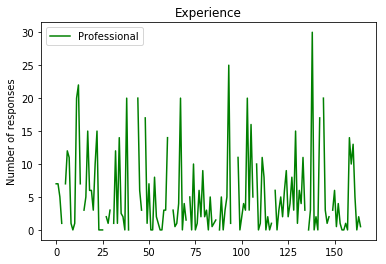

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

x_values = range(len(data))
professional_experience = []
for row in data:
    professional_experience.append(row[BACKGROUND_YEARS_PROFESSIONAL])

plt.plot(x_values, professional_experience, 'g-', label='Professional')
plt.title('Experience')
plt.ylabel('Number of responses')
plt.legend(loc=2)
plt.show()

### TODO: Add programming experience to the plot

Hint: Copy code above and add extra plt.plot command

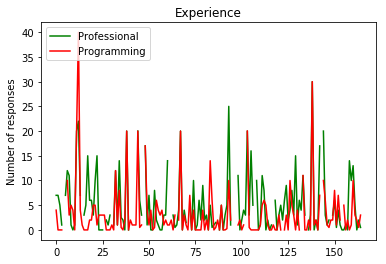

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
x_values = range(len(data))

professional_experience = []
programming_experience = []
for row in data:
    professional_experience.append(row[BACKGROUND_YEARS_PROFESSIONAL])
    programming_experience.append(row[BACKGROUND_YEARS_PROGRAMMING])

plt.plot(x_values, professional_experience, 'g-', label='Professional')
plt.plot(x_values, programming_experience, 'r-', label='Programming')
plt.title('Experience')
plt.ylabel('Number of responses')
plt.legend(loc=2)
plt.show()

### A real frequency polygon

The above illustrate how to build a line chart in matplotlib but is not really frequency polygon as the x-axis corresponds to individual answers rather than groups. A more useful frequency poloygon uses the histogram data from above.

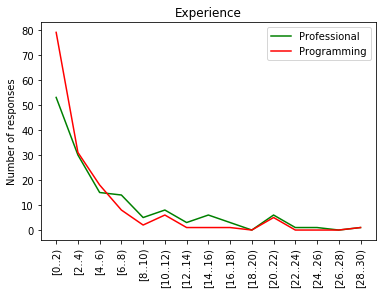

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
x_values = range(len(prof_freqs))
x_labels = ['[{}..{})'.format(int(prof_bins[i]), int(prof_bins[i+1])) for i in range(len(prof_freqs))]
plt.plot(x_values, prof_freqs, 'g-', label='Professional')
plt.plot(x_values, prog_freqs, 'r-', label='Programming')
plt.xticks(x_values, x_labels, rotation='vertical')
plt.title('Experience')
plt.ylabel('Number of responses')
plt.legend(loc=1)
plt.show()

### Making a bar chart

Now let's make a bar chart of communication importance.

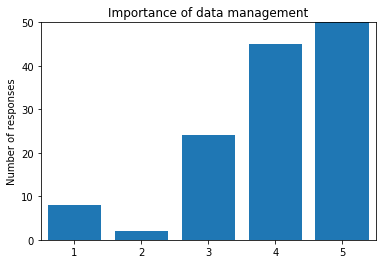

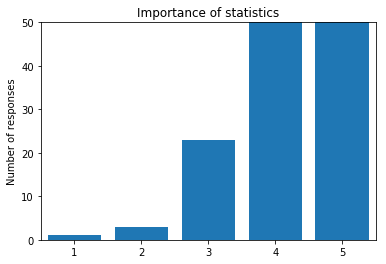

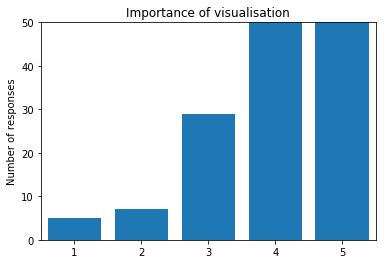

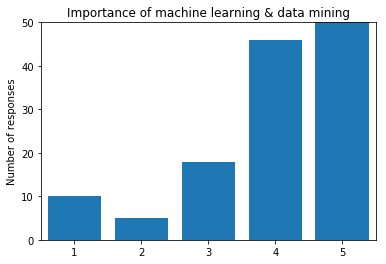

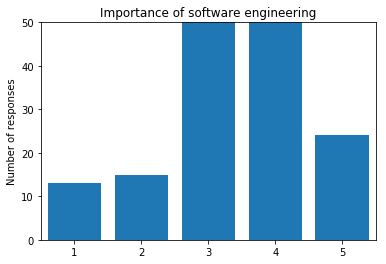

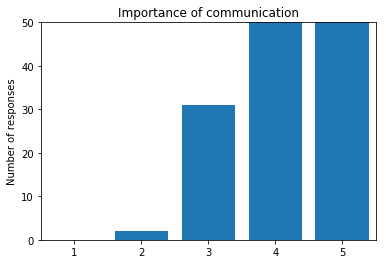

In [24]:
from collections import OrderedDict
IMPORT_KEYS = ['1', '2', '3', '4', '5']
def make_importance_plot(data, column_key, title):
    c = Counter(row[column_key] for row in data)
    d = OrderedDict([(k,c[k]) if k in c else (k,0) for k in IMPORT_KEYS])
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates
    xs = [i+0.5 for i,_ in enumerate(IMPORT_KEYS)]
    plt.bar(xs, d.values())
    plt.ylabel('Number of responses')
    plt.axis([0,5,0,50])
    plt.title(title)
    plt.xticks([i + 0.5 for i, _ in enumerate(IMPORT_KEYS)], IMPORT_KEYS)
    plt.show()
for a in IMPORT_AREAS:
    title = 'Importance of {}'.format(a.lower())
    make_importance_plot(data, a, title)

### TODO: Make bar charts of known and future industries

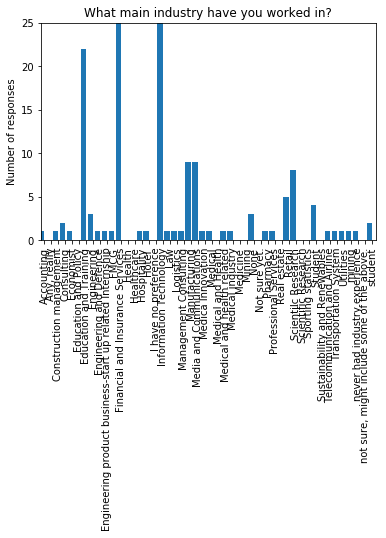

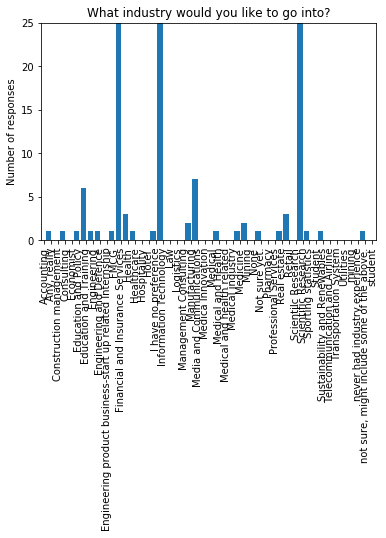

In [26]:
def iter_values(data, column_key):
    for row in data:
        yield(row[column_key])

background_industries = set(iter_values(data, BACKGROUND_INDUSTRY))
goals_industries = set(iter_values(data, GOALS_INDUSTRY))
all_industries = sorted(background_industries.union(goals_industries))

def make_bar_chart(data, column_key, values, y_min, y_max):
    c = Counter(row[column_key] for row in data)
    d = OrderedDict([(k,c[k]) if k in c else (k,0) for k in values])
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates
    xs = [i+0.1 for i,_ in enumerate(values)]
    plt.bar(xs, d.values())
    plt.ylabel('Number of responses')
    plt.axis([0,len(values),y_min,y_max])
    plt.title(column_key)
    plt.xticks([i + 0.5 for i, _ in enumerate(values)], values, rotation='vertical')
    plt.show()

make_bar_chart(data, BACKGROUND_INDUSTRY, all_industries, 0, 25)
make_bar_chart(data, GOALS_INDUSTRY, all_industries, 0, 25)

### Making a histogram

Now let's use the `histogram` from `numpy` above to create a histograms of professional and programming experience.

C:\Users\aana3295\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\aana3295\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


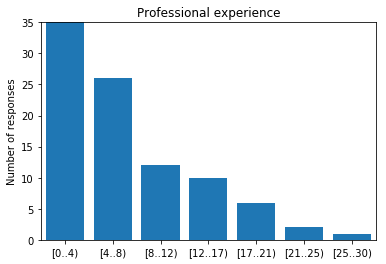

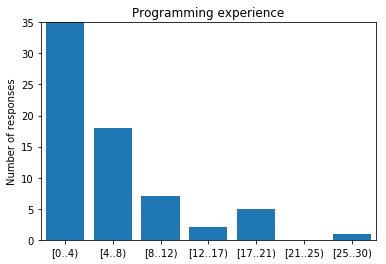

In [28]:
def iter_histogram(data, column_key):
    v = [row[column_key] for row in data] # grab values
    freqs, bins = np.histogram(v, bins=7, range=(0,30))
    for i, freq in enumerate(freqs):
        yield ('[{}..{})'.format(int(bins[i]), int(bins[i+1])), freq)
        
def make_histogram_plot(data, column_key, title):
    d = OrderedDict(iter_histogram(data, column_key))
    keys = list(d.keys())
    xs = [i+0.5 for i,_ in enumerate(keys)]
    plt.bar(xs, d.values())
    plt.ylabel('Number of responses')
    plt.axis([0,7,0,35])
    plt.title(title)
    plt.xticks([i + 0.5 for i, _ in enumerate(keys)], keys)
    plt.show()
    
make_histogram_plot(data, BACKGROUND_YEARS_PROFESSIONAL, 'Professional experience')
make_histogram_plot(data, BACKGROUND_YEARS_PROGRAMMING, 'Programming experience')

### Making a scatterplot

Finally, let's make a scatterplot to compare professional and programming experience.

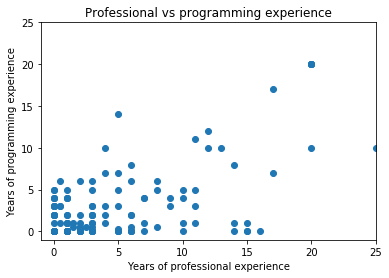

In [29]:
professional_experience = [row[BACKGROUND_YEARS_PROFESSIONAL] for row in data]
programming_experience = [row[BACKGROUND_YEARS_PROGRAMMING] for row in data]
plt.scatter(professional_experience, programming_experience)
plt.title('Professional vs programming experience')
plt.xlabel('Years of professional experience')
plt.ylabel('Years of programming experience')
plt.axis([-1,25,-1,25])
plt.show()

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE 5: Box plots and correlation

### Visualising distributions with box plots

Mean and standard deviation are not informative for skewed data. `boxplot` is is a good visualisation for viewing and comparing distributions. It also shows outliers, e.g., values greater than `Q3+1.5*IQR` or less than `Q1-1.5*IQR`.

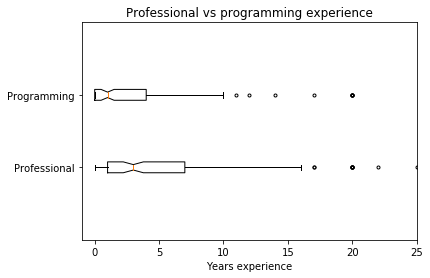

In [30]:
professional_experience = [v for v in professional_experience if v is not np.nan]
programming_experience = [v for v in programming_experience if v is not np.nan]
plt.boxplot([professional_experience, programming_experience], 
            vert=False, notch=True, flierprops={'marker':'.'})
plt.axis([-1,25,0,3])
plt.yticks([1,2], ['Professional', 'Programming'])
plt.xlabel('Years experience')
plt.title('Professional vs programming experience')
plt.show()

### Calculating correlation between two variables

Pearson's r is the covariance of the two variables divided by the product of their standard deviations. Spearman rho is a common nonparametric test that is used in stead of Pearson's r when 

In [31]:
from scipy import stats
# only keep rows where both professional and programming experience are defined
prof, prog = [], []
for row in data:
    if row[BACKGROUND_YEARS_PROFESSIONAL] is np.nan:
        continue # ignore rows with no value for professional experience
    elif row[BACKGROUND_YEARS_PROGRAMMING] is np.nan:
        continue # ignore rows with no value for programming experience
    else:
        prof.append(row[BACKGROUND_YEARS_PROFESSIONAL])
        prog.append(row[BACKGROUND_YEARS_PROGRAMMING])
print("Pearson (r, p): {}".format(stats.pearsonr(prof, prog)))

print(stats.spearmanr(prof, prog))

Pearson (r, p): (0.68749053351475331, 6.542793901237467e-21)
SpearmanrResult(correlation=0.35273215817022341, pvalue=1.916717334800197e-05)


### TODO: Calculate Kendall's tau between importance ratings

In [32]:
print('{:.2f}'.format(3.14159))
for i,k1 in enumerate(IMPORT_AREAS):
    print(k1)
    v1 = [r[k1] for r in data]
    for j in range(i+1,len(IMPORT_AREAS),1):
        k2 = IMPORT_AREAS[j]
        v2 = [r[k2] for r in data]
        tau = stats.kendalltau(v1, v2)
        print('* {:5.2f} (p={:.3f}): {}'.format(tau.correlation, tau.pvalue, k2))

3.14
Data management
*  0.49 (p=0.000): Statistics
*  0.48 (p=0.000): Visualisation
*  0.42 (p=0.000): Machine Learning & Data Mining
*  0.38 (p=0.000): Software Engineering
*  0.36 (p=0.000): Communication
Statistics
*  0.48 (p=0.000): Visualisation
*  0.46 (p=0.000): Machine Learning & Data Mining
*  0.25 (p=0.000): Software Engineering
*  0.34 (p=0.000): Communication
Visualisation
*  0.40 (p=0.000): Machine Learning & Data Mining
*  0.33 (p=0.000): Software Engineering
*  0.40 (p=0.000): Communication
Machine Learning & Data Mining
*  0.35 (p=0.000): Software Engineering
*  0.29 (p=0.000): Communication
Software Engineering
*  0.30 (p=0.000): Communication
Communication


C:\Users\aana3295\Anaconda3\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE 6: Text data

### Simple tokenisation and word counts

Tokenisation is the process of breaking text into it's component parts, e.g., sentences, words. Below is a simple whitespace tokeniser that also removes some leading/trailing punctuation. We can use this to count the frequency of terms acros our data science definitions. 

In [33]:
def tokenise(text):
    for word in text.lower().split():
        yield word.strip('.,')

def is_valid_word(w):
    if w == '':
        return False
    else:
        return True

def iter_ds_def_words(d):
    for row in d:
        for word in tokenise(row[GOALS_DEFINITION]):
            if is_valid_word(word):
                yield word

from collections import Counter
c = Counter(iter_ds_def_words(data))
print(c)

Counter({'data': 136, 'and': 70, 'of': 57, 'the': 56, 'to': 56, 'from': 40, 'insights': 29, 'science': 29, 'is': 26, 'a': 24, 'it': 21, 'information': 15, 'making': 14, 'using': 14, 'knowledge': 13, 'statistics': 11, 'programming': 11, 'with': 11, 'in': 11, 'that': 11, 'extract': 11, 'use': 10, 'analysis': 9, 'decision': 9, 'into': 9, 'useful': 9, 'make': 9, 'by': 9, 'actionable': 8, 'statistical': 8, 'business': 8, 'study': 7, 'on': 7, 'meaningful': 7, 'extracting': 6, 'for': 6, 'analysing': 6, 'large': 6, 'decisions': 6, 'scientific': 5, 'skills': 5, 'pattern': 5, 'future': 5, 'finding': 5, 'methods': 5, 'tools': 4, 'various': 4, 'based': 4, 'ability': 4, 'or': 4, 'find': 4, 'analyze': 4, 'patterns': 4, 'about': 4, 'mining': 4, 'build': 4, 'intelligent': 4, 'create': 4, 'solutions': 4, 'field': 4, 'derive': 3, 'mathematical': 3, 'predictions': 3, 'better': 3, 'machine': 3, 'fun': 3, 'combination': 3, 'computer': 3, 'understanding': 3, 'raw': 3, 'all': 3, 'provide': 3, 'model': 3, 'pr

### Removing stop words

Very common function words can be removed to focus our analysis on content words.

In [34]:
STOP_WORDS = frozenset([ # http://www.nltk.org/book/ch02.html#stopwords_index_term
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
    'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
    ])
def is_valid_word(w):
    if w == '':
        return False
    if w.lower() in STOP_WORDS:
        return False
    else:
        return True

c = Counter(iter_ds_def_words(data))
c

Counter({'+': 2,
         '-': 1,
         'ability': 4,
         'accurate': 1,
         'achieve': 1,
         'action': 1,
         'actionable': 8,
         'actions': 1,
         'aid': 1,
         'aiming': 1,
         'algorithms': 2,
         'already': 1,
         'amazing': 1,
         'amount': 2,
         'amounts': 1,
         'analysing': 6,
         'analysis': 9,
         'analyst': 1,
         'analytic': 1,
         'analytical': 1,
         'analytics': 2,
         'analyze': 4,
         'analyzing': 1,
         'application': 1,
         'applications': 1,
         'applied': 1,
         'applying': 1,
         'area': 1,
         'art': 2,
         'augment': 1,
         'available': 1,
         'based': 4,
         'behaviors': 1,
         'behaviour': 1,
         'behind': 1,
         'better': 3,
         'big': 2,
         'bots': 1,
         'build': 4,
         'business': 8,
         'business-empowering': 1,
         'career': 1,
         'category': 1,
   

### Plotting term frequencies

Now we can build a simple horizontal bar chart that displays the most common terms across data science definitions.

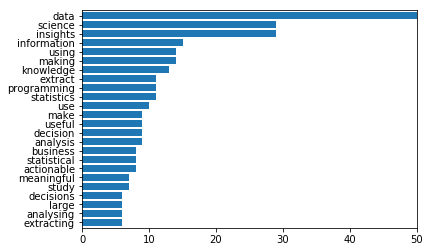

In [36]:
import operator

def iter_word_freqs(d, min_freq=4):
    c = Counter(iter_ds_def_words(d))
    for term, freq in c.items():
        if freq >= min_freq:
            yield term, freq

d = OrderedDict([(k,v) for k,v in sorted(iter_word_freqs(data,6), key=operator.itemgetter(1))])
ys = [i+0.5 for i,_ in enumerate(d)]
plt.barh(ys, d.values(), align='center')
plt.yticks(ys, list(d.keys()))
plt.axis([0,50,0-0.1,len(d)+0.1])
plt.show()